## Notebook to create plots with logged data

In [1]:
import os
import plotting 
import pandas as pd

<Figure size 7200x4800 with 0 Axes>

In [5]:
file_path = "/home/niko/Info/cablab/runs/dqn/268/logs.csv"
output_path = "/home/niko/Desktop/"
df = pd.read_csv(file_path)

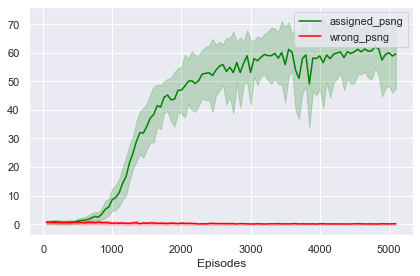

In [6]:
plotting.plot_values(df, ["assigned_psng", "wrong_psng"], output_path)

In [8]:
files = ["/home/niko/Info/cablab/runs/ppo/86/logs.csv", "/home/niko/Info/cablab/runs/dqn/270/logs.csv", "/home/niko/Info/cablab/runs/dqn/271/logs.csv"]

output_path = "/home/niko/Desktop/"

ids = ["useless_steps"]

labels = ["PPO", "DQN", "DQN (Munchhausen)"]

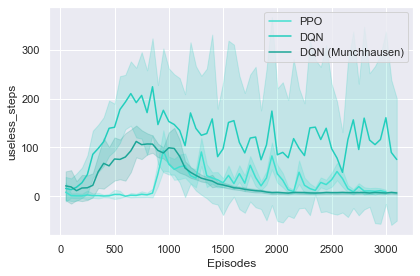

In [9]:
dfs = []

def plot_from_files():     
    for i,file in enumerate(files): 
        df = pd.DataFrame()
        df = pd.read_csv(file)
        dfs.append(df)
    plotting.plot_mult_agent(dfs, ids, output_path,labels)

plot_from_files()

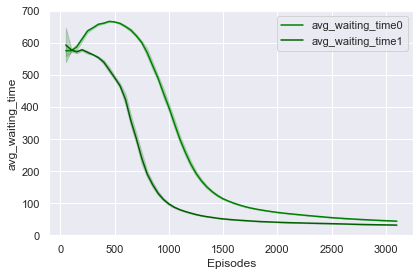

In [18]:
files = ["/home/niko/Info/cablab/runs/ma-dqn/202/logs1.csv", "/home/niko/Info/cablab/runs/ma-dqn/204/logs2.csv"]
ids = ['avg_waiting_time']
dfs = []

def plot_from_files():     
    for i,file in enumerate(files): 
        
        try:
            df = pd.DataFrame()
            df = pd.read_csv(file)
        except: 
            print("File not found")
        dfs.append(df)
    plotting.plot_mult_agent(dfs, ids, output_path)

plot_from_files()

In [18]:
ids = ["useless_steps"]

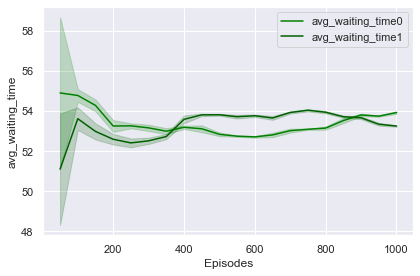

In [5]:
files = ["/home/niko/Info/cablab/runs/ma-dqn/202/eval/logs_summed.csv", "/home/niko/Info/cablab/runs/ma-dqn/202/eval2/logs_summed.csv"]
ids = ['avg_waiting_time']
labels = ["optimal-assignment", "random-assignment"]
dfs = []

def plot_from_files():     
    for i,file in enumerate(files): 
        try:
            df = pd.DataFrame()
            df = pd.read_csv(file)
        except: 
            print("File not found")
        dfs.append(df)
    plotting.plot_mult_agent(dfs, ids, output_path)

plot_from_files()

In [9]:
dfs[0]

,Unnamed: 0,assigned_psng,do_nothing_arr,do_nothing_opt_arr,do_nothing_sub_arr,illegal_moves,illegal_pick_ups,mean_drop_off_path,mean_pick_up_path,n_passengers,rewards,useless_steps,wrong_psng
0,0,0.0,135.0,24.0,111.0,581.0,284.0,0.000000,0.000000,0.0,-8.65,178.0,0.0
1,1,0.0,137.0,36.0,101.0,587.0,299.0,0.000000,117.000000,1.0,-6.86,0.0,0.0
2,2,0.0,134.0,1.0,133.0,561.0,305.0,0.000000,0.000000,0.0,-8.66,866.0,0.0
3,3,0.0,152.0,36.0,116.0,557.0,291.0,0.000000,0.000000,0.0,-8.48,214.0,0.0
4,4,0.0,145.0,44.0,101.0,573.0,294.0,0.000000,556.000000,1.0,-6.67,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,3094,0.0,30.0,1.0,29.0,746.0,220.0,54.615385,19.250000,12.0,15.34,67.0,0.0
3095,3095,0.0,190.0,50.0,140.0,539.0,355.0,18.333333,18.833333,24.0,39.06,350.0,0.0
3096,3096,0.0,277.0,231.0,46.0,627.0,73.0,22.850000,27.842105,19.0,32.00,155.0,0.0
3097,3097,0.0,305.0,229.0,76.0,532.0,128.0,10.576923,20.769231,26.0,45.40,306.0,0.0


In [30]:
folder_path = '/home/niko/Info/cablab/runs/ma-dqn/58/'
file_names = ['logs1.csv', 'logs2.csv']

dfs = []

for file_name in file_names: 
    file_path = os.path.join(folder_path, file_name)
    df = pd.DataFrame()
    df = pd.read_csv(file_path)
    dfs.append(df)

In [31]:
values_to_add = ['illegal_pick_ups','illegal_moves', 'n_passengers', 'rewards', 'mean_pick_up_path', 'mean_drop_off_path', 'do_nothing_arr' ,'do_nothing_opt_arr','do_nothing_sub_arr']

for value in values_to_add: 
    dfs[0][value] = dfs[0][value] + dfs[1][value]

summed_df = dfs[0]

file_name = os.path.join(folder_path, "summed_logs.csv")
summed_df.to_csv(file_name)

In [1]:
output_path = os.path.join(folder_path, 'summed')

if not os.path.exists(output_path):
        os.makedirs(output_path)

plotting.plot_values(summed_df, ['rewards'], output_path)
plotting.plot_values(summed_df, ['n_passengers'], output_path)

NameError: name 'folder_path' is not defined

## Make average of multiple runs

In [2]:
files = []

start_folder = 253
end_folder = 257

for i in range(start_folder, end_folder+1):
    files.append(f"/home/niko/Info/cablab/runs/dqn/{i}/logs.csv")

output_path = "/home/niko/Desktop/"
ids = ["rewards"]

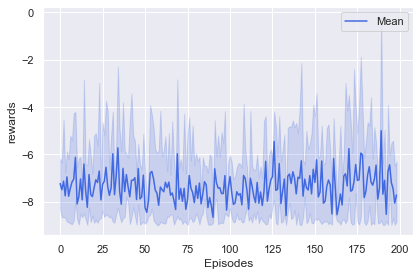

In [3]:
dfs = []
n_files = len(files)

for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)
    dfs.append(df)

plotting.plot_mult_runs(dfs, ids, output_path)